In [1]:
# imports
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from highlight_text import fig_text

In [2]:
df = pd.read_csv('../data/SerieA-2122.csv')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,21/08/2021,17:30,Inter,Genoa,4,0,H,2,0,...,2.32,-1.5,1.88,2.05,1.89,2.03,1.96,2.09,1.86,2.01
1,I1,21/08/2021,17:30,Verona,Sassuolo,2,3,A,0,1,...,2.03,0.0,1.88,2.05,1.89,2.04,2.00,2.07,1.86,2.02
2,I1,21/08/2021,19:45,Empoli,Lazio,1,3,A,1,3,...,2.21,0.5,2.00,1.93,2.00,1.93,2.06,1.95,1.99,1.88
3,I1,21/08/2021,19:45,Torino,Atalanta,1,2,A,0,1,...,2.45,1.0,2.06,1.87,2.08,1.85,2.19,1.90,2.03,1.84
4,I1,22/08/2021,17:30,Bologna,Salernitana,3,2,H,0,0,...,2.16,-1.0,1.94,1.99,1.92,2.01,2.02,2.01,1.91,1.95


In [3]:
# create a list of unique teams
teams = df.HomeTeam.unique()

# create a dictionary called teamLists
# there will be an entry for each team with the list [0]
teamLists = {Team : [0] for Team in teams}

In [4]:
'''
# for each row in our dataframe, do the following:
for row in df.itertuples():
    # add the home and away team names to the correct variable
    home = row.HomeTeam
    away = row.AwayTeam
    
    # if the home team goals (FTHG column in the dataframe) are higher than the away team, give the correct points to each team
    if row.FTHG > row.FTAG:
        teamLists[home].append(3)
        teamLists[away].append(0)
    # if the home team goals are less than the away team, give the correct points
    elif row.FTHG < row.FTAG:
        teamLists[home].append(0)
        teamLists[away].append(3)
    # in any other case (a draw), give the correct points
    else:
        teamLists[home].append(1)
        teamLists[away].append(1)
'''

'\n# for each row in our dataframe, do the following:\nfor row in df.itertuples():\n    # add the home and away team names to the correct variable\n    home = row.HomeTeam\n    away = row.AwayTeam\n    \n    # if the home team goals (FTHG column in the dataframe) are higher than the away team, give the correct points to each team\n    if row.FTHG > row.FTAG:\n        teamLists[home].append(3)\n        teamLists[away].append(0)\n    # if the home team goals are less than the away team, give the correct points\n    elif row.FTHG < row.FTAG:\n        teamLists[home].append(0)\n        teamLists[away].append(3)\n    # in any other case (a draw), give the correct points\n    else:\n        teamLists[home].append(1)\n        teamLists[away].append(1)\n'

In [5]:
teams = df.HomeTeam.unique()
teamLists = {Team : [0] for Team in teams}

for row in df.itertuples():
    home = row.HomeTeam
    away = row.AwayTeam
    
    if row.FTHG > row.FTAG:
        teamLists[home].append(teamLists[home][-1]+3)
        teamLists[away].append(teamLists[away][-1]+0)
    elif row.FTHG < row.FTAG:
        teamLists[home].append(teamLists[home][-1]+0)
        teamLists[away].append(teamLists[away][-1]+3)
    else:
        teamLists[home].append(teamLists[home][-1]+1)
        teamLists[away].append(teamLists[away][-1]+1)

In [6]:
teamLists['Milan']

[0,
 3,
 6,
 9,
 10,
 13,
 16,
 19,
 22,
 25,
 28,
 31,
 32,
 32,
 32,
 35,
 38,
 39,
 39,
 42,
 45,
 48,
 48,
 49,
 52,
 55,
 56,
 57,
 60,
 63,
 66,
 67,
 68,
 71,
 74,
 77,
 80,
 83,
 86]

data viz

In [7]:
matchday = list(range(0,39))

In [8]:
from PIL import Image
import urllib

(-0.5, 191.5, 191.5, -0.5)

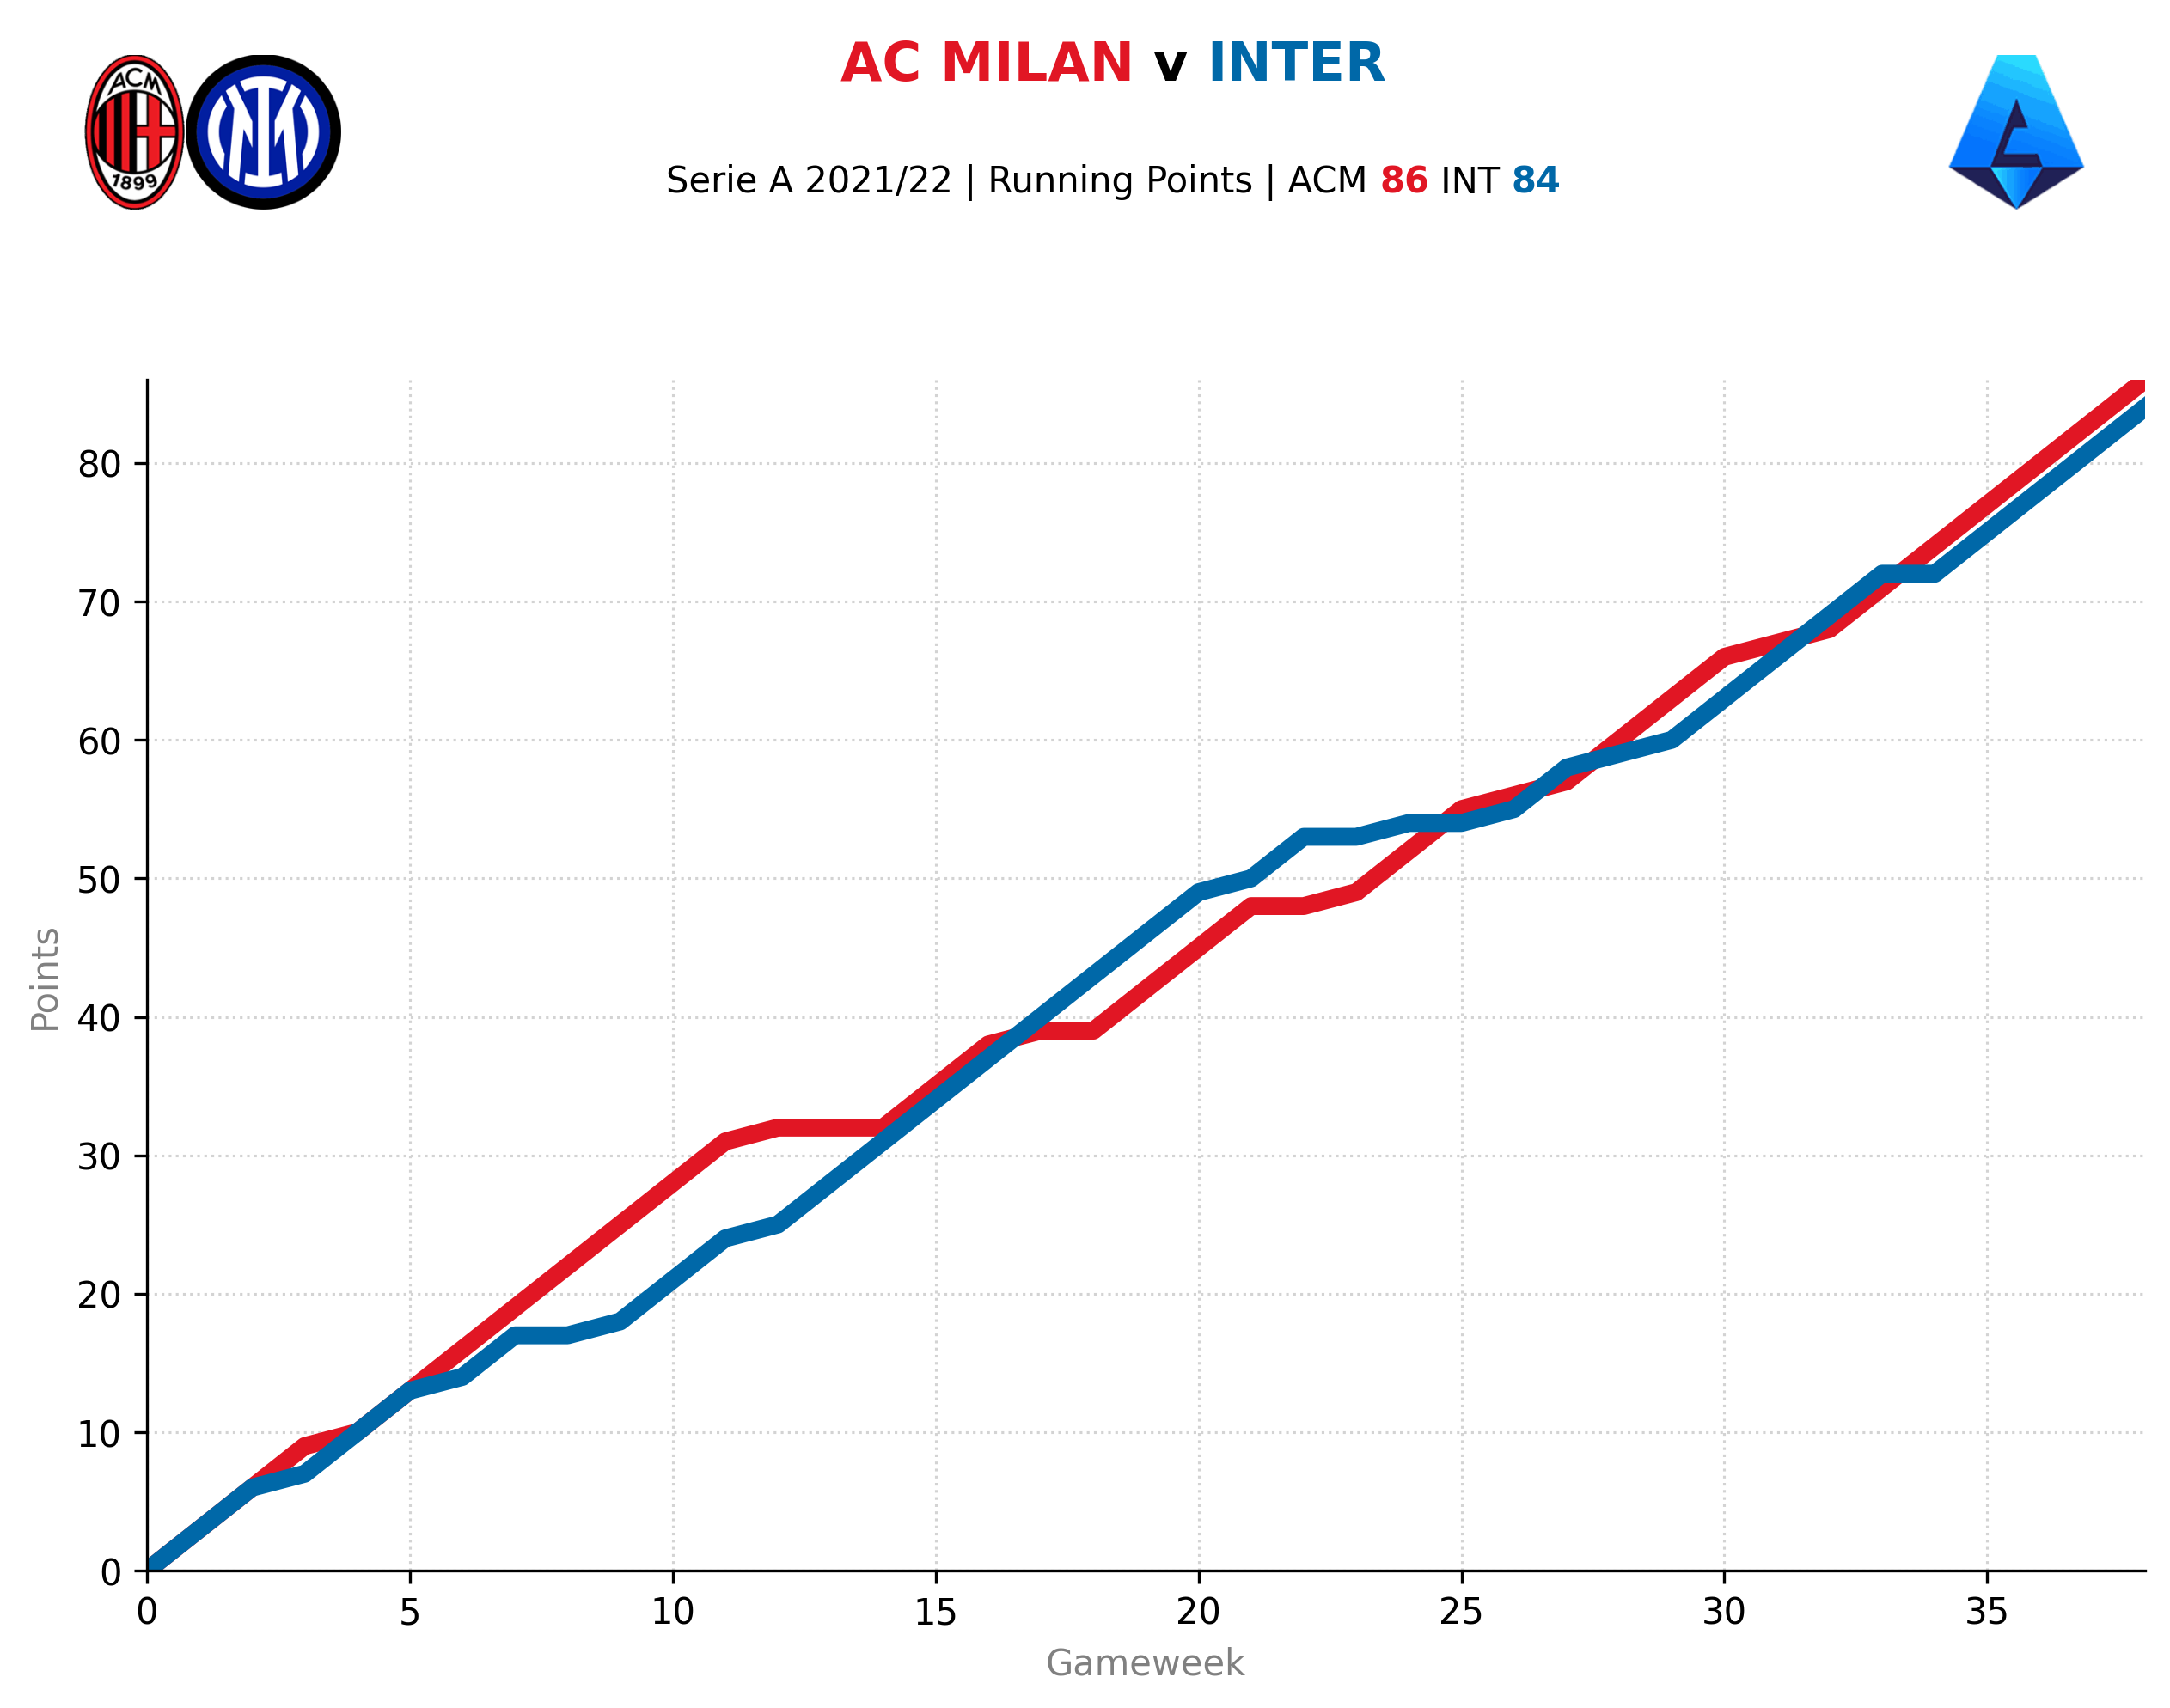

In [9]:
# create the bare bones of what will be our visualisation
fig = plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.subplot(111, facecolor="white")

# set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

# remove the margins between our lines and the axes
ax.margins(x=0,y=0)

# remove the spines of the chart on the top and right sides
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# add our data as before, but setting colours and widths of lines
line_1 = ax.plot(matchday, teamLists['Milan'], color = "#e11624", linewidth=5)
line_2 = ax.plot(matchday, teamLists['Inter'], color = "#0068a8", linewidth=5)

# give the axes and plot a title each
plt.xlabel('Gameweek', color='grey', fontsize=10)
plt.ylabel('Points', color='grey', fontsize=10)

# title and subtitle for the legend
fig_text(
    x=0.5, y=1.1,
    s="<AC MILAN> v <INTER>",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color="black",
    weight="bold",
    size=15,
    ha='center',  # centering the text horizontally
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x=0.5, y=1.02,
    s="Serie A 2021/22 | Running Points | ACM <86> INT <84>",
    highlight_textprops=[
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color="black",
    size=10,
    ha='center',
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

# logo home team
logo_ax = fig.add_axes([0.07, .99, 0.1, 0.1], zorder=1)
club_icon_h = Image.open(urllib.request.urlopen(f"{fotmob_url}8564.png"))
logo_ax.imshow(club_icon_h)
logo_ax.axis("off")

# logo away team
logo_ax = fig.add_axes([0.12, .99, 0.1, 0.1], zorder=1)
club_icon_a = Image.open(urllib.request.urlopen(f"{fotmob_url}8636.png"))
logo_ax.imshow(club_icon_a)
logo_ax.axis("off")

fotmob_url_league = "https://images.fotmob.com/image_resources/logo/leaguelogo/"

# league logo
logo_ax = fig.add_axes([0.8, .99, 0.1, 0.1], zorder=1)
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_league}55.png"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

In [10]:
fig.savefig('../figures/pts-running_ACM-INT.png', bbox_inches='tight')